In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

**11. In this problem we will investigate the t-statistic for the null hypoth-
esis H 0 : β = 0 in simple linear regression without an intercept. To
begin, we generate a predictor x and a response y as follows.**

> set.seed(1)

> x=rnorm(100)

> y=2*x+rnorm(100)

In [2]:
np.random.seed(1)
x =  np.random.normal(loc = 0.0, scale = 1.0, size = 100)
y = 2*x + np.random.normal(loc = 0.0, scale = 1.0, size = 100)
data = pd.DataFrame({'x':x,'y':y})

**(a) Perform a simple linear regression of y onto x , without an in-
tercept. Report the coefficient estimate
ˆ
β, the standard error of
this coefficient estimate, and the t-statistic and p-value associ-
ated with the null hypothesis H 0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the command lm(y∼x+0) .)**

In [3]:
results_smf_x = smf.ols('y ~ 0 + x',data).fit()
results_smf_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Sat, 21 Dec 2019   Prob (F-statistic):                    3.46e-36
Time:                        10:57:11   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**belta值为2.1067，标准差为0.106，t统计量为19.792，p值为0（拒绝0假设）**

**(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefficient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H 0 : β = 0. Comment on these results.**

In [4]:
results_smf_y = smf.ols('x ~ 0 + y',data).fit()
results_smf_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Sat, 21 Dec 2019   Prob (F-statistic):                    3.46e-36
Time:                        10:57:11   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**belta值为0.3789，标准差为0.019，t统计量为19.792，p值为0（拒绝0假设）**

**(c) What is the relationship between the results obtained in (a) and
(b)?**

In [5]:
print('belta 1 for x to y : ',results_smf_x.params.x)
print('belta 2 for y to x : ',results_smf_y.params.y)
print('belta 1 * belta 2 : ',results_smf_x.params.x*results_smf_y.params.y)

belta 1 for x to y :  2.1067416889591146
belta 2 for y to x :  0.3789044229072016
belta 1 * belta 2 :  0.7982537438695966


按照逻辑x对y的belta应与y对x的belta互为倒数，乘积为1，但因为实际模型中+np.random.normal(loc = 0.0, scale = 1.0, size = 100)的影响导致乘积偏差约为0.8，实际如果元模型中的belta越大，该乘积可以迫近为1，可以用belta = 1000检验。在belta = 2情况下使用size = 1e8验证可知x对y的belta迫近2，y对x的belta迫近0.4。

**(d) For the regression of Y onto X without an intercept, the t-
statistic for H 0 : β = 0 takes the form
ˆ
β/SE( ˆ β), where
ˆ
β is
given by (3.38), and where
SE( ˆ β) =
! ?
n
i=1 (y i − x i
ˆ
β) 2
(n − 1)
? n
i ? =1 x
2
i ?
.
124 3. Linear Regression
(These formulas are slightly different from those given in Sec-
tions 3.1.1 and 3.1.2, since here we are performing regression
without an intercept.) Show algebraically, and confirm numeri-
cally in R , that the t-statistic can be written as
( √ n − 1)
? n
i=1 x i y i
? ( ? n
i=1 x
2
i )(
? n
i ? =1 y
2
i ? ) − (
? n
i ? =1 x i ? y i ? ) 2
.**

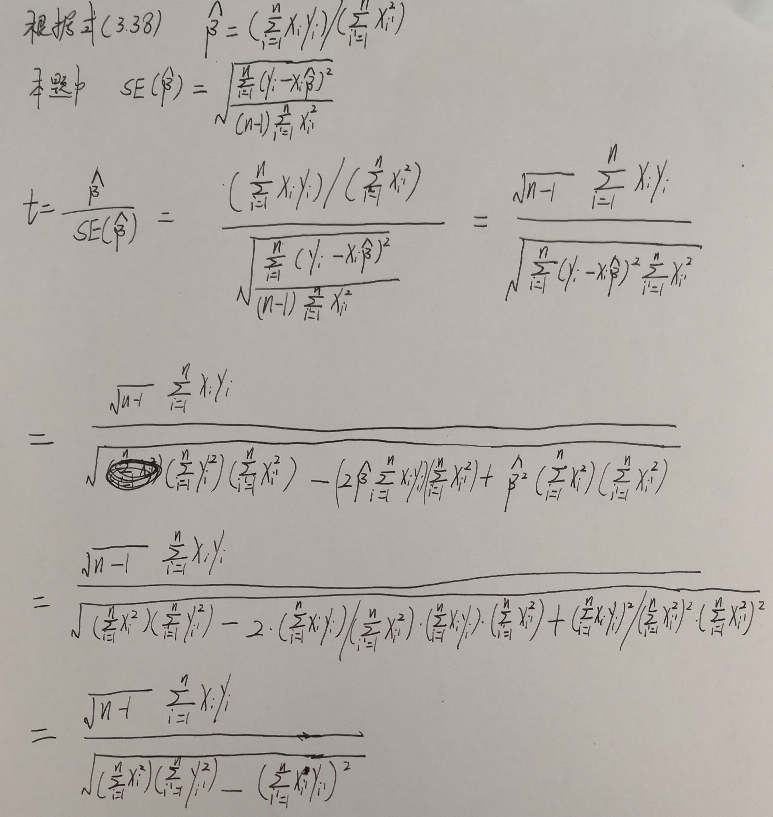

In [6]:
#使用程序确认
t_math = ((len(y) - 1) ** 0.5) * ((x*y).sum())/(((x ** 2).sum()*(y ** 2).sum())-(x*y).sum()**2)**0.5
print('代数计算得到t：',t_math)
print('statsmodels得到t：',results_smf_x.tvalues.x)
print('statsmodels得到t（反向）：',results_smf_y.tvalues.y)

代数计算得到t： 19.791801987091205
statsmodels得到t： 19.7918019870912
statsmodels得到t（反向）： 19.791801987091205


**(e) Using the results from (d), argue that the t-statistic for the re-
gression of y onto x is the same as the t-statistic for the regression
of x onto y**

代数计算中x/y互换即可，statsmodels结果即可验证

**(f) In R , show that when regression is performed with an intercept,
the t-statistic for H 0 : β 1 = 0 is the same for the regression of y
onto x as it is for the regression of x onto y**

In [7]:
results_smf_x_with_intercept = smf.ols('y ~ x',data).fit()
results_smf_y_with_intercept = smf.ols('x ~ y',data).fit()
print('包含intercept的statsmodels得到t（ x onto y）：',results_smf_x_with_intercept.tvalues.x)
print('包含intercept的statsmodels得到t（ y onto x）：',results_smf_y_with_intercept.tvalues.y)
print('两者是否相同：',results_smf_x_with_intercept.tvalues.x == results_smf_y_with_intercept.tvalues.y)

包含intercept的statsmodels得到t（ x onto y）： 19.782585315629255
包含intercept的statsmodels得到t（ y onto x）： 19.782585315629255
两者是否相同： True


In [8]:
results_smf_x_with_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           5.39e-36
Time:                        10:57:23   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1470      0.094      1.564      0.121      -0.039       0.334
x              2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
results_smf_y_with_intercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           5.39e-36
Time:                        10:57:45   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0440      0.040     -1.090      0.279      -0.124       0.036
y              0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""